# About Dataset
Machine Predictive Maintenance Classification Dataset
Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

UID: unique identifier ranging from 1 to 10000

productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number

air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise

torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.

tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.
Target : Failure or Not
Failure Type : Type of Failure ##we are not doing this

Acknowledgements
UCI : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix

In [ ]:
# can skip if you want, just for visuals
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
filterwarnings('ignore')

In [ ]:
#LOADING THE DATA
maintenance = pd.read_excel('predictive_maintenance.xlsx')

In [ ]:
maintenance.tail(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
9990,9991,L57170,L,298.8,308.5,1527,36.2,3,0
9991,9992,M24851,M,298.9,308.4,1827,26.1,5,0
9992,9993,L57172,L,298.8,308.4,1484,39.2,8,0
9993,9994,L57173,L,298.8,308.4,1401,47.3,10,0
9994,9995,L57174,L,298.8,308.3,1634,27.9,12,0
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0


In [ ]:
maintenance.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target'],
      dtype='object')

In [ ]:
maintenance.drop(columns=['UDI', 'Product ID'], inplace=True)

In [ ]:
maintenance.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder


# One-hot encode 'Type' column
encoder = OneHotEncoder(sparse=False)
encoded_type = encoder.fit_transform(maintenance[['Type']])
encoded_type_df = pd.DataFrame(encoded_type, columns=encoder.categories_[0], index=maintenance.index)
maintenance = pd.concat([maintenance, encoded_type_df], axis=1)
maintenance.drop(columns=['Type'], inplace=True)

In [ ]:
# Rename columns
maintenance = maintenance.rename(columns={
    'Type': 'productType',       # Assuming 'Type' refers to product type
    'Air temperature [K]': 'Air_temperature',
    'Process temperature [K]': 'Process_temperature',
    'Rotational speed [rpm]': 'Rotational_speed',
    'Torque [Nm]': 'Torque',
    'Tool wear [min]': 'Tool_wear',
})

# Display the updated DataFrame info
maintenance.info()
print(maintenance)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Air_temperature      10000 non-null  float64
 1   Process_temperature  10000 non-null  float64
 2   Rotational_speed     10000 non-null  int64  
 3   Torque               10000 non-null  float64
 4   Tool_wear            10000 non-null  int64  
 5   Target               10000 non-null  int64  
 6   H                    10000 non-null  float64
 7   L                    10000 non-null  float64
 8   M                    10000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 703.2 KB
      Air_temperature  Process_temperature  Rotational_speed  Torque  \
0               298.1                308.6              1551    42.8   
1               298.2                308.7              1408    46.3   
2               298.1                308.5              1498    49.4   
3  

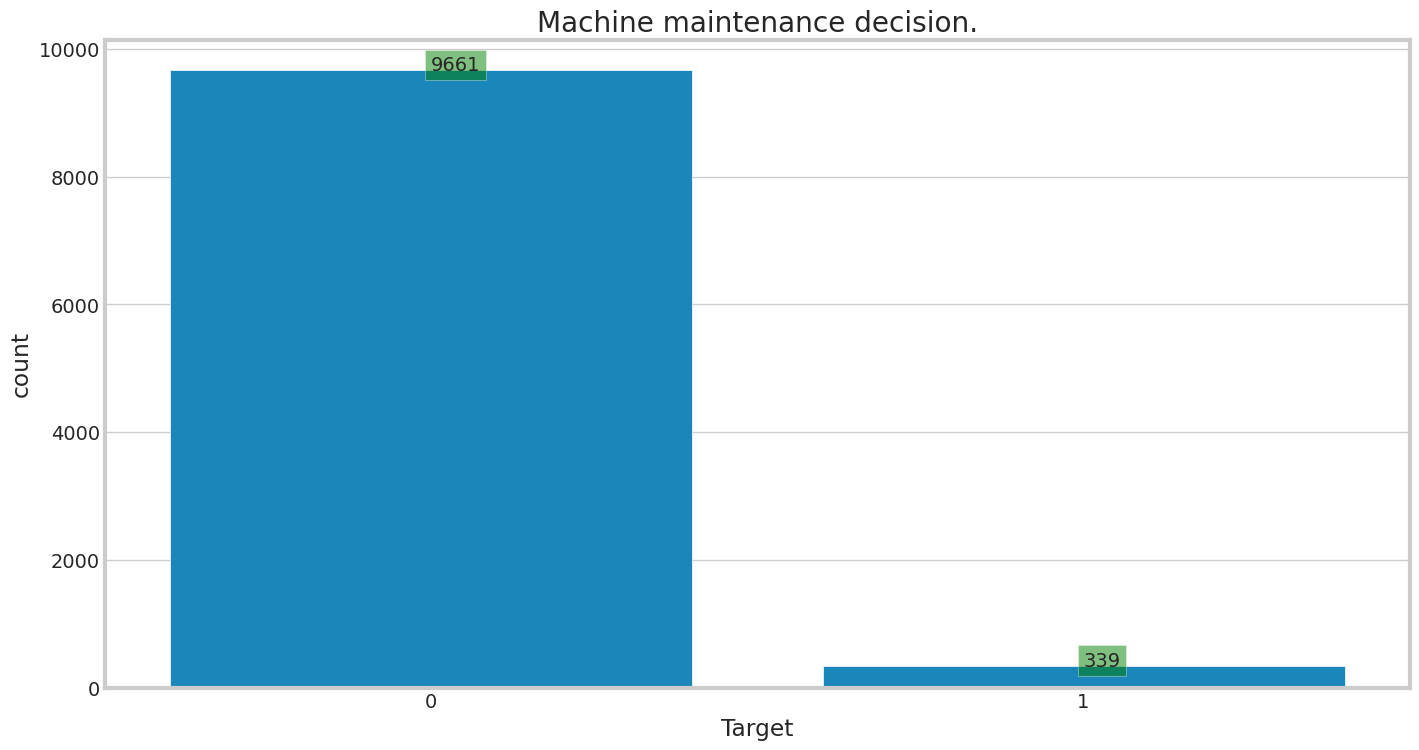

In [ ]:
'''This code creates a bar plot using Seaborn (sns) library to visualize the,
distribution of the target variable 'Target' in the maintenance dataset.'''
plt.figure(figsize=(15,8))
g=sns.countplot(x='Target', data=maintenance)
for i, u in enumerate(maintenance['Target'].value_counts().values):
    g.text(i, u, str(u), bbox=dict(facecolor='green', alpha=0.5))
plt.title('Machine maintenance decision.')
plt.show()

Target are very unbalanced. 96.61% of the datasets are no failure and 3.39% of the datasets are failure.


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
X = maintenance.drop(columns=['Target'])
y = maintenance['Target']

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

Target
0    9661
1    9661
Name: count, dtype: int64


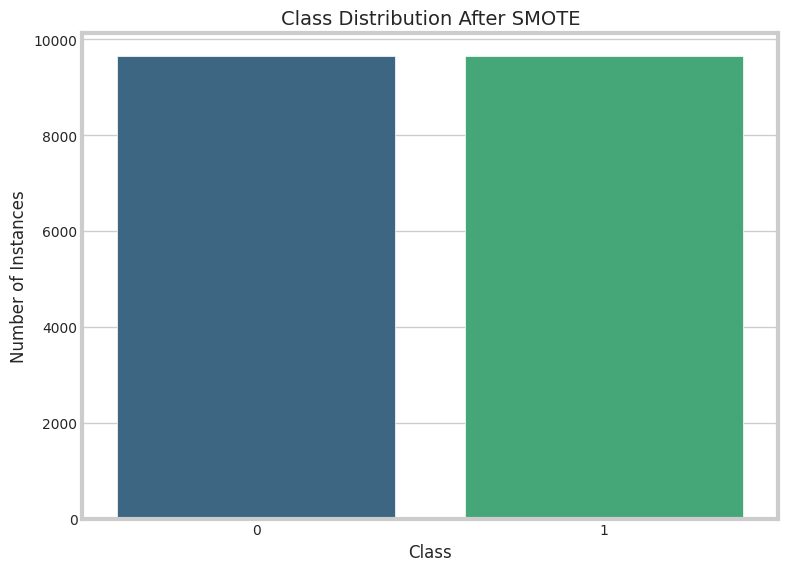

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Target'] = y_resampled

# Check the new class distribution
class_counts = df_resampled['Target'].value_counts()

import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Class Distribution After SMOTE', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
correlation_matrix = X_resampled.corr()
correlation_matrix


,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,H,L,M
Air_temperature,1.000000,0.860232,-0.094732,0.118142,-0.067744,-0.016344,-0.013059,0.024351
Process_temperature,0.860232,1.000000,-0.040054,0.052621,-0.020070,-0.015881,-0.005630,0.016055
Rotational_speed,-0.094732,-0.040054,1.000000,-0.850978,-0.090341,-0.010801,-0.071602,0.083945
Torque,0.118142,0.052621,-0.850978,1.000000,0.082478,-0.023097,0.093782,-0.086523
Tool_wear,-0.067744,-0.020070,-0.090341,0.082478,1.000000,-0.034392,0.105388,-0.091924
H,-0.016344,-0.015881,-0.010801,-0.023097,-0.034392,1.000000,-0.410652,-0.186507
L,-0.013059,-0.005630,-0.071602,0.093782,0.105388,-0.410652,1.000000,-0.819204
M,0.024351,0.016055,0.083945,-0.086523,-0.091924,-0.186507,-0.819204,1.000000


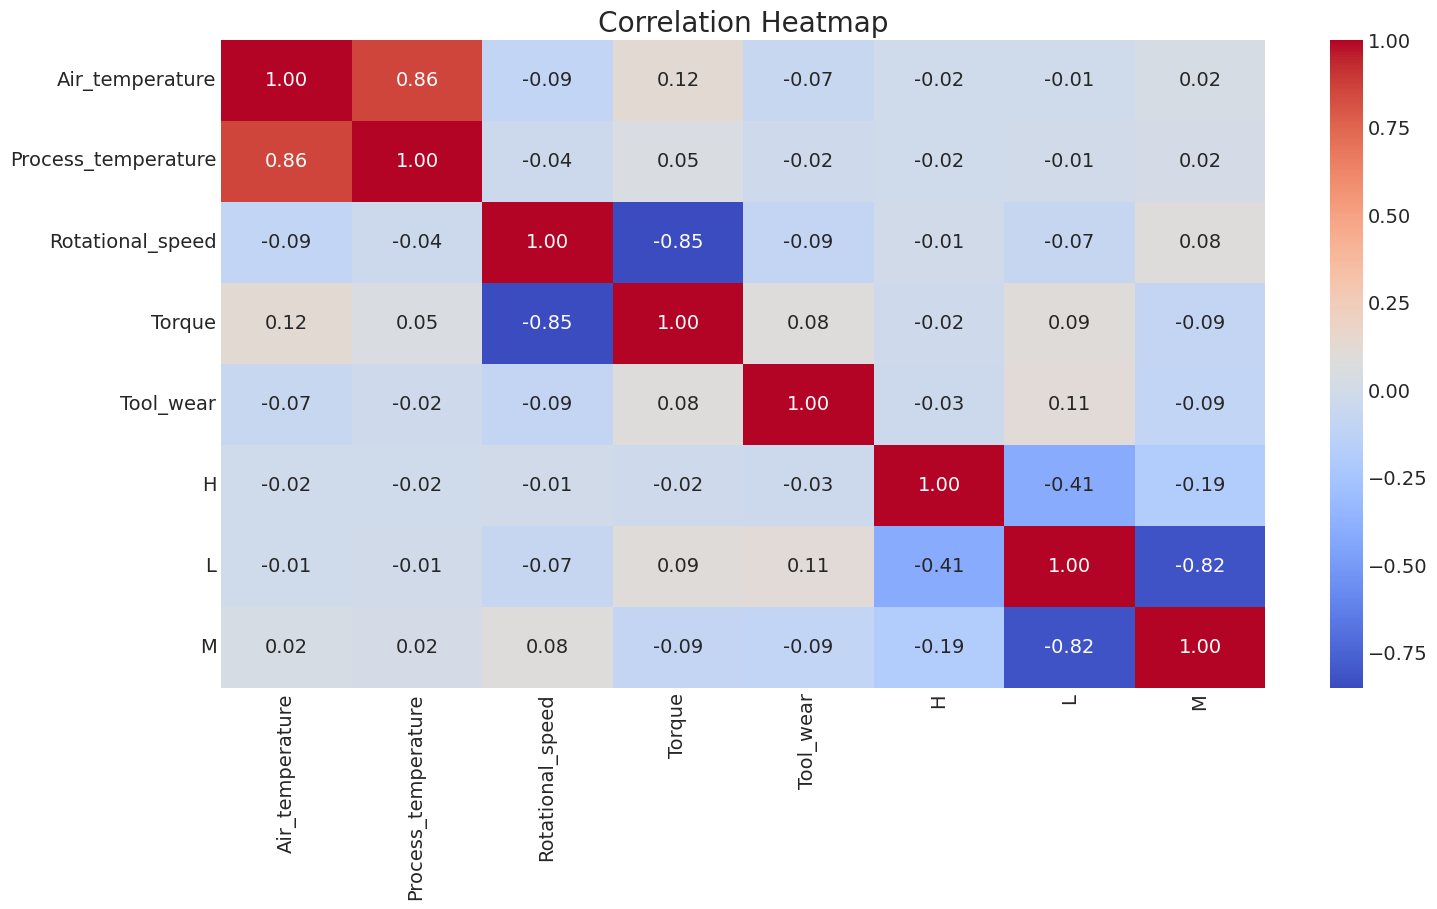

In [ ]:

# Plot heatmap

plt.figure(figsize=(15, 8))  # Corrected figsize parameter
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Air temperature and Process temperature are correlated due to Δ𝑇 = Air temperature - Process temperature.

rotational speed and torque are also correlated. power = torque x rotational speed

Skewness is a measure of the degree to which the data distribution deviates from symmetry around the mean. A skewness value of 0 indicates a symmetric distribution.

If the skewness is negative, it means the distribution is skewed to the left (long tail to the left).
If the skewness is positive, it means the distribution is skewed to the right (long tail to the right).

In [ ]:
X_resampled.skew()

Air_temperature       -0.207922
Process_temperature   -0.211763
Rotational_speed       2.712775
Torque                -0.492093
Tool_wear             -0.166629
H                      2.977169
L                     -0.605587
M                      1.027013
dtype: float64

## Feature engineering

We create another feature such that **Power [W]**, **Overstrain [minNm]**, **Heat dissipation [rpminK]**.

In [ ]:
X_resampled['Power'] = X_resampled['Torque']*(2*np.pi*X_resampled['Rotational_speed']/60.0)
X_resampled['Overstrain'] = X_resampled['Torque'] * X_resampled['Tool_wear']
X_resampled['Heat dissipation'] = abs(X_resampled['Air_temperature'] -X_resampled['Process_temperature'])*X_resampled['Rotational_speed']

Let's check correlation

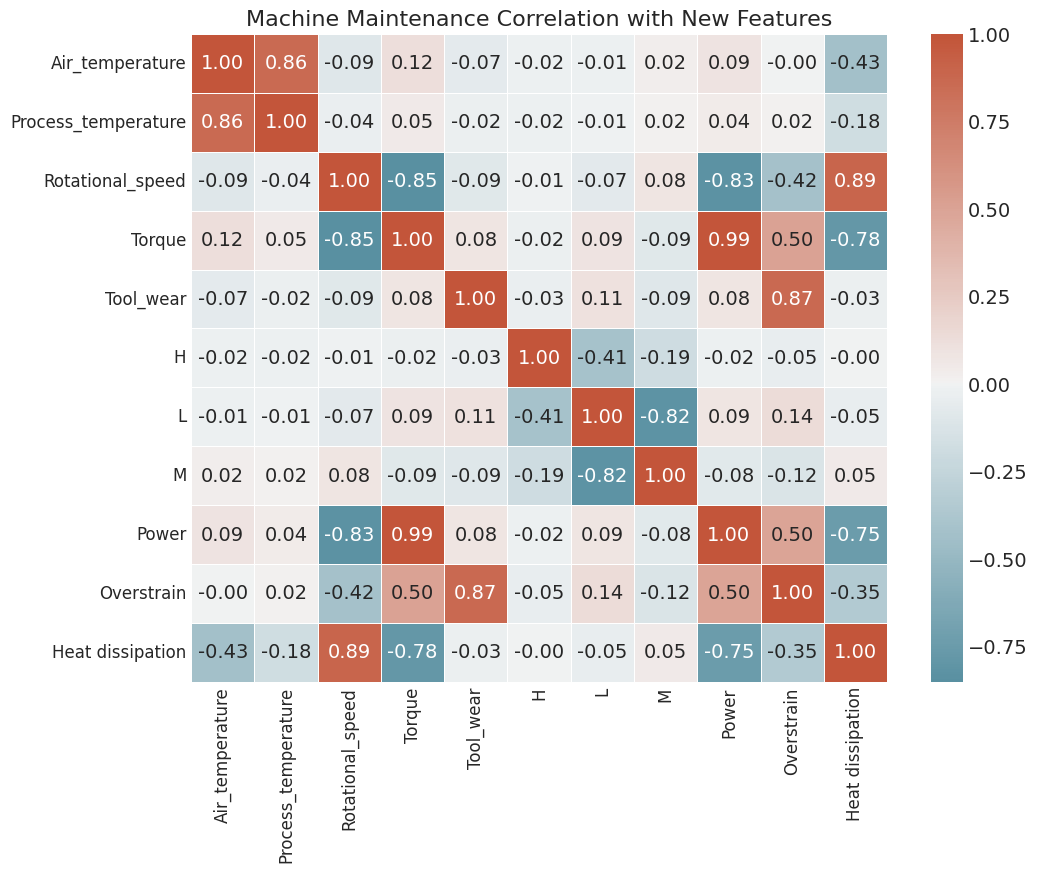

In [ ]:

# Set the figure size
plt.figure(figsize=(10, 8))

# Define a custom color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the correlation heatmap with annotations
sns.heatmap(X_resampled.corr(), annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5)

# Set the title
plt.title('Machine Maintenance Correlation with New Features', fontsize=16)

# Adjust the font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


In [ ]:
# Calculate the correlation matrix
correlation_matrix = X_resampled.corr()

# Print the correlation values
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     Air_temperature  Process_temperature  Rotational_speed  \
Air_temperature             1.000000             0.860232         -0.094732   
Process_temperature         0.860232             1.000000         -0.040054   
Rotational_speed           -0.094732            -0.040054          1.000000   
Torque                      0.118142             0.052621         -0.850978   
Tool_wear                  -0.067744            -0.020070         -0.090341   
H                          -0.016344            -0.015881         -0.010801   
L                          -0.013059            -0.005630         -0.071602   
M                           0.024351             0.016055          0.083945   
Power                       0.092955             0.041434         -0.828347   
Overstrain                 -0.001741             0.016580         -0.424257   
Heat dissipation           -0.427092            -0.184266          0.889249   

                       Torque  

Some feature are correlated with other feature. Power and Torque have opposite trends. Overstrain and tool wear have same trends.

# Machine Failure: Descriptive analysis and visualization

In [ ]:
X_resampled[['Power', 'Overstrain', 'Heat dissipation']].describe()

,Power,Overstrain,Heat dissipation
count,19322.000000,19322.000000,19322.000000
mean,6760.054699,5686.943605,14753.026357
std,1519.387880,3818.097103,3454.713848
min,1148.440610,0.000000,9851.400000
25%,5854.460012,2362.961927,12406.206894
50%,6876.208044,5257.641153,14180.638220
75%,7819.829538,8552.548929,15997.557282
max,10469.923005,16497.000000,32476.200000


# Data mining technique

The objective is to Simulate dataset to predict machine failure and its type. To do so, we select feature
by using variance inflation factor (vif). The VIF is a measure of colinearity among predictor variables within a multiple regression. A high VIF indicates that the associated indepedent variable is highly collinear with other variables.

vif factor is a diagonal of the inverse matrix correlation.

In [ ]:
matcorr = X_resampled.corr()
vif = pd.Series(np.linalg.inv(matcorr.to_numpy()).diagonal(), index=X_resampled.columns, name='vif_factor' )

In [ ]:
vif.reset_index()

,index,vif_factor
0,Air_temperature,1.249836e+02
1,Process_temperature,6.013401e+01
2,Rotational_speed,1.220943e+02
3,Torque,5.219210e+01
4,Tool_wear,1.306350e+01
5,H,5.010813e+13
6,L,1.470490e+14
7,M,1.266572e+14
8,Power,4.038737e+01
9,Overstrain,1.745120e+01


In [ ]:
#X_resampled = X_resampled.drop(columns=['H', 'L', 'M' ], inplace=True)
print(X_resampled)

       Air_temperature  Process_temperature  Rotational_speed     Torque  \
0           298.100000           308.600000              1551  42.800000   
1           298.200000           308.700000              1408  46.300000   
2           298.100000           308.500000              1498  49.400000   
3           298.200000           308.600000              1433  39.500000   
4           298.200000           308.700000              1408  40.000000   
...                ...                  ...               ...        ...   
19317       298.358987           309.121721              1320  67.796692   
19318       302.200000           310.600000              1348  49.821909   
19319       296.018663           306.483775              1370  55.809332   
19320       303.338217           312.166313              1284  70.384289   
19321       302.258678           310.620661              1311  53.434714   

       Tool_wear         H         L         M        Power    Overstrain  \
0         

In [ ]:
X_resampled = X_resampled.drop(columns=['H', 'L', 'M'])
matcorr = X_resampled.corr()
vif = pd.Series(np.linalg.inv(matcorr.to_numpy()).diagonal(), index=X_resampled.columns, name='vif_factor' )
vif.reset_index()

,index,vif_factor
0,Air_temperature,124.153521
1,Process_temperature,59.735285
2,Rotational_speed,121.136385
3,Torque,52.115885
4,Tool_wear,13.057531
5,Power,40.347698
6,Overstrain,17.406269
7,Heat dissipation,168.254776


In [ ]:
X_resampled = X_resampled.drop(columns=['Heat dissipation'])
matcorr = X_resampled.corr()
vif = pd.Series(np.linalg.inv(matcorr.to_numpy()).diagonal(), index=X_resampled.columns, name='vif_factor' )
vif.reset_index()

,index,vif_factor
0,Air_temperature,4.119815
1,Process_temperature,3.986827
2,Rotational_speed,3.792696
3,Torque,50.848178
4,Tool_wear,12.703568
5,Power,39.702507
6,Overstrain,16.872704


In [ ]:
X_resampled = X_resampled.drop(columns=['Torque'])
matcorr = X_resampled.corr()
vif = pd.Series(np.linalg.inv(matcorr.to_numpy()).diagonal(), index=X_resampled.columns, name='vif_factor' )
vif.reset_index()

,index,vif_factor
0,Air_temperature,3.953329
1,Process_temperature,3.901822
2,Rotational_speed,3.202050
3,Tool_wear,11.451428
4,Power,6.084832
5,Overstrain,15.061850


In [ ]:
X_resampled = X_resampled.drop(columns=['Overstrain'])
matcorr = X_resampled.corr()
vif = pd.Series(np.linalg.inv(matcorr.to_numpy()).diagonal(), index=X_resampled.columns, name='vif_factor' )
vif.reset_index()

,index,vif_factor
0,Air_temperature,3.952617
1,Process_temperature,3.900372
2,Rotational_speed,3.198630
3,Tool_wear,1.021867
4,Power,3.190654


In [ ]:
cols_selected = ['Air_temperature','Process_temperature','Rotational_speed','Tool_wear','Power']

# Data preparation

In [ ]:
Xdata = X_resampled[cols_selected] #
target = y_resampled #

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, target, random_state=42, test_size=0.3)

# Model Training

Logistic Regression:


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize logistic regression model
log_reg = LogisticRegression()

In [ ]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
log_reg_preds = log_reg.predict(X_test)

In [ ]:
# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.797136449887873


In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, log_reg_preds)

print("R-squared value:", r_squared)

R-squared value: 0.1885451958840637


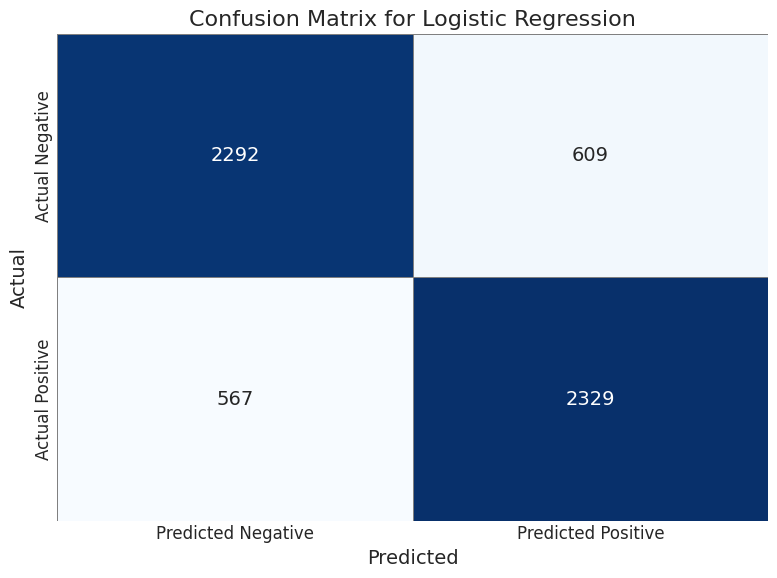

Feature Coefficients:
Air_temperature: 1.0430990489041008
Process_temperature: -1.0904847103854673
Rotational_speed: 0.007354518298967146
Tool_wear: 0.013576906028820727
Power: 0.0017653074112256109


In [ ]:
# Compute confusion matrix
conf_matrix_lr = confusion_matrix(y_test, log_reg_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'],
            cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Print coefficients
print("Feature Coefficients:")
for feature, coef in zip(X_train.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef}")



In [ ]:
# Print coefficients
print("Feature Coefficients:")
for feature, coef in zip(X_train.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef}")

Feature Coefficients:
Air_temperature: 1.0430990489041008
Process_temperature: -1.0904847103854673
Rotational_speed: 0.007354518298967146
Tool_wear: 0.013576906028820727
Power: 0.0017653074112256109


In [ ]:
check = pd.DataFrame({'Test data': y_test, 'Predicted Data': log_reg_preds})
print(check)

       Test data  Predicted Data
5426           0               0
15624          1               1
5527           0               0
8541           0               0
13833          1               1
...          ...             ...
16167          1               1
15619          1               1
8746           0               0
14429          1               1
1521           0               0

[5797 rows x 2 columns]


# Decision Trees:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
decision_tree_preds = decision_tree.predict(X_test)

# Calculate accuracy
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)
print("Decision Tree Accuracy:", decision_tree_accuracy)

Decision Tree Accuracy: 0.9554942211488701


In [ ]:
r_squared = r2_score(y_test, decision_tree_preds)

print("R-squared value:", r_squared)

R-squared value: 0.8219767521582385


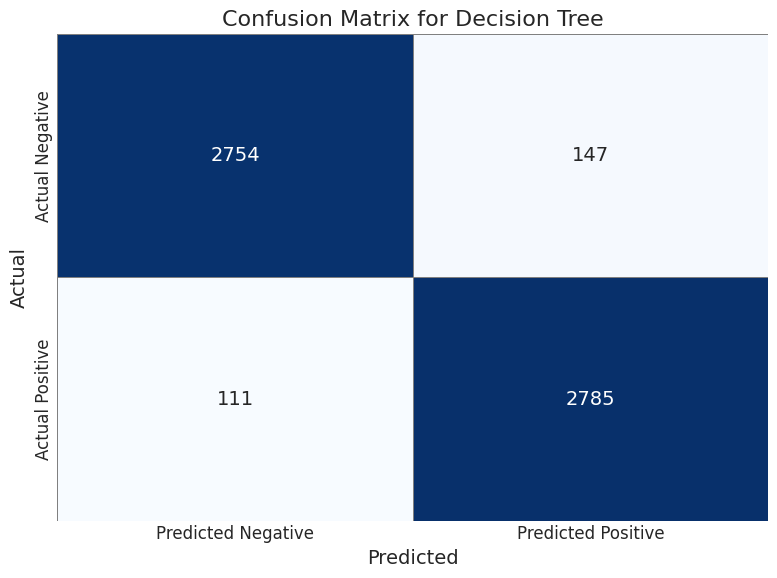

In [ ]:
# Compute confusion matrix
conf_matrix_dr = confusion_matrix(y_test, decision_tree_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dr, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'],
            cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix for Decision Tree', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
print("Feature Importances:")
for feature, importance in zip(X_train.columns, decision_tree.feature_importances_):
    print(f"{feature}: {importance}")

Feature Importances:
Air_temperature: 0.06343375052649743
Process_temperature: 0.0494456690444634
Rotational_speed: 0.35947449380326185
Tool_wear: 0.21783369767078342
Power: 0.30981238895499386


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize random forest classifier
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
random_forest_preds = random_forest.predict(X_test)

# Calculate accuracy
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)
print("Random Forest Accuracy:", random_forest_accuracy)


Random Forest Accuracy: 0.976712092461618


In [ ]:
r_squared = r2_score(y_test, random_forest_preds)

print("R-squared value:", r_squared)

R-squared value: 0.9068483005479154


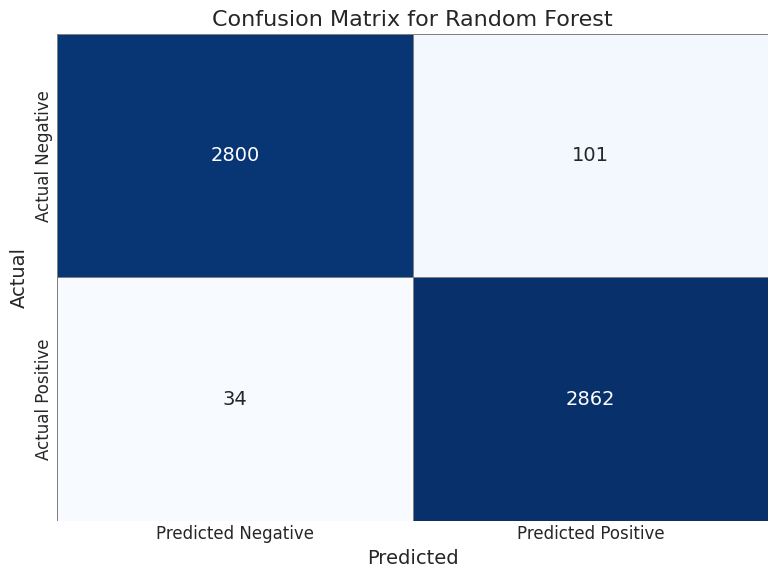

In [ ]:



# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, random_forest_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'],
            cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix for Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, random_forest_preds))

# Feature importances
feature_importances = random_forest.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
print("Feature Importances:")
for i in sorted_indices:
    print(f"{X_train.columns[i]}: {feature_importances[i]}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2901
           1       0.97      0.99      0.98      2896

    accuracy                           0.98      5797
   macro avg       0.98      0.98      0.98      5797
weighted avg       0.98      0.98      0.98      5797

Feature Importances:
Rotational_speed: 0.3310298961625854
Power: 0.28684371643345774
Tool_wear: 0.21646879046516201
Air_temperature: 0.09734599671628466
Process_temperature: 0.06831160022251034


In [ ]:
random_forest.score(X_test, y_test)

0.976712092461618

In [ ]:
random_forest.score(X_train, y_train)

1.0